##4.2 Simulating a waveform over a single tree

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from run_start import *
from hips2img import *

start:

	VERBOSE flag on (-v option)

read_spectral_file:	1 data entries read in file wb/brdf_waveband.dat

camera Camera 1: at 0.000000 0.000000 7.000000 focalLength: 5.715026

camera light 1: at 0.000000 0.000000 7.000000 focalLength: 571.502615

(100.00)


hips2img.py:26: RuntimeWarning: divide by zero encountered in divide
  arr_b = ((arr_b - np.percentile(arr_b, 2.5)) / np.percentile(arr_b, 97.5))
hips2img.py:27: RuntimeWarning: invalid value encountered in less
  arr_b[arr_b < 0] = 0
hips2img.py:28: RuntimeWarning: invalid value encountered in greater
  arr_b[arr_b > 1] = 1


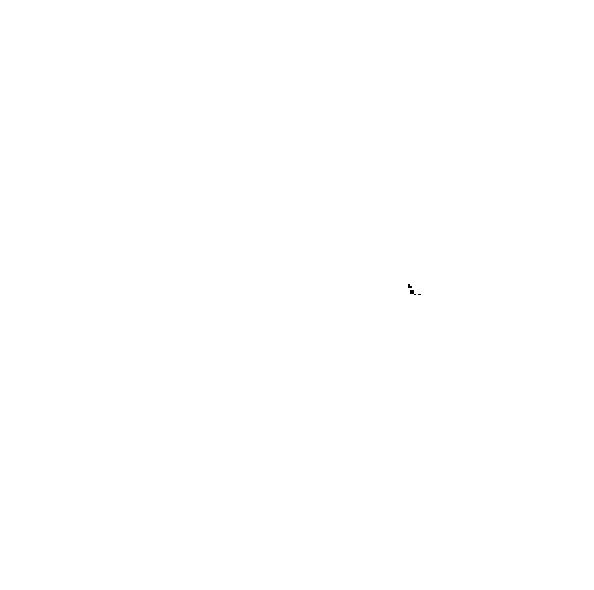

In [92]:
# we have specified the brdf_wavband.dat as this has only one band
cmd = 'echo 14 camera/ncamera.dat light/nlight.dat | \
       start -v -RATm 1 -RATsensor_wavebands wb/brdf_waveband.dat obj/birch_tree_scene.obj'
error = run_start(cmd)

if not error:
    # we can look at a slice of the resulting image using the 'order'
    # option, in this case we are looking at slices 0, 10, 30
    hips2img('cameraPsfImage.hips', stretch=True, order=[9])

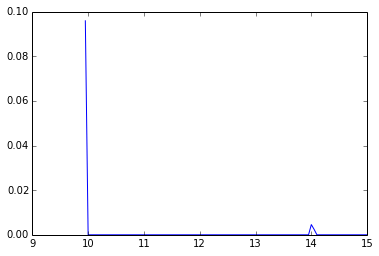

In [91]:
# We can then look at the results of this by plotting
# reflectance against distance
refl = np.loadtxt('nresults.dat.direct')
plt.plot(refl[:, 0], refl[:, 1:].mean(axis=1))

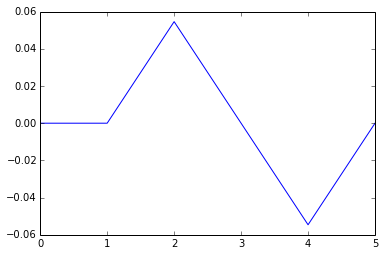

In [64]:
plt.plot(np.gradient(refl[:, 1:].mean(axis=1)))